# Predicción de Enfermedad cardíaca con Regresión Logística

## Juan David Mora Daza

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [115]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('heart_cleveland_upload.csv')

In [119]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [121]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

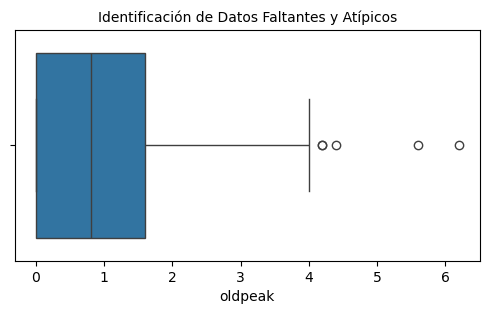

In [123]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [126]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en Sexo: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo de dolor en el pecho: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión arterial en reposo: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol en sangre: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Electrocardiograma en reposo : ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Angina inducida por ejercicio: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresión del segmento ST: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de vasos coloreados en fluoroscopia: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en Talasemia: ",Datos['thal'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Sexo:  96
Cantidad de Registros con cero en Tipo de dolor en el pecho:  23
Cantidad de Registros con cero en Presión arterial en reposo:  0
Cantidad de Registros con cero en Colesterol en sangre:  0
Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada:  0
Cantidad de Registros con cero en Electrocardiograma en reposo :  147
Cantidad de Registros con cero en Angina inducida por ejercicio:  200
Cantidad de Registros con cero en Depresión del segmento ST:  96
Cantidad de Registros con cero en Número de vasos coloreados en fluoroscopia:  174
Cantidad de Registros con cero en Talasemia:  164


In [128]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['age']=Datos['age'].replace(0,Datos['age'].mean())
Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['trestbps']=Datos['trestbps'].replace(0,Datos['trestbps'].mean())
Datos['chol']=Datos['chol'].replace(0,Datos['chol'].mean())
Datos['thalach']=Datos['thalach'].replace(0,Datos['thalach'].mean())
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['ca']=Datos['ca'].replace(0,Datos['ca'].mean())
Datos['thal']=Datos['thal'].replace(0,Datos['thal'].mean())


In [130]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en Edad: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en Sexo: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo de dolor en el pecho: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión arterial en reposo: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol en sangre: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Electrocardiograma en reposo : ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Angina inducida por ejercicio: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresión del segmento ST: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de vasos coloreados en fluoroscopia: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en Talasemia: ",Datos['thal'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Sexo:  0
Cantidad de Registros con cero en Tipo de dolor en el pecho:  0
Cantidad de Registros con cero en Presión arterial en reposo:  0
Cantidad de Registros con cero en Colesterol en sangre:  0
Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada:  0
Cantidad de Registros con cero en Electrocardiograma en reposo :  0
Cantidad de Registros con cero en Angina inducida por ejercicio:  0
Cantidad de Registros con cero en Depresión del segmento ST:  0
Cantidad de Registros con cero en Número de vasos coloreados en fluoroscopia:  0
Cantidad de Registros con cero en Talasemia:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos de Colesterol en sangre')

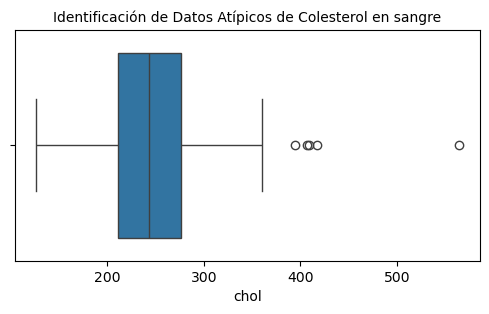

In [132]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Atípicos de Colesterol en sangre', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos de Presión arterial en reposo')

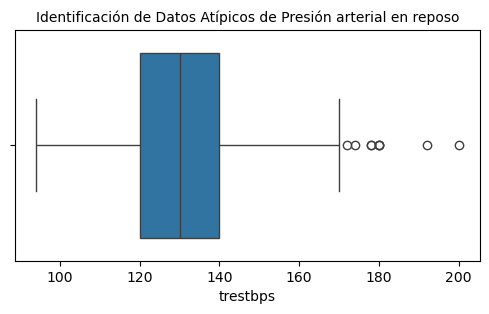

In [134]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos de Presión arterial en reposo', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos de Frecuencia cardíaca máxima alcanzada de')

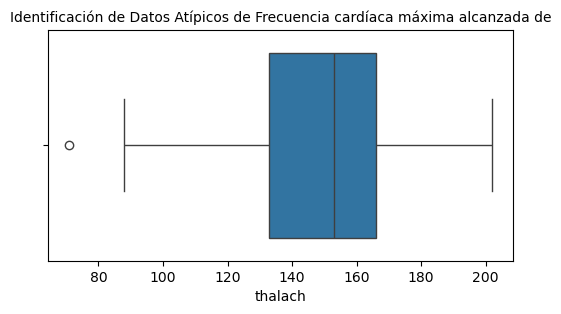

In [136]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos de Frecuencia cardíaca máxima alcanzada de', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos de Depresión del segmento ST ')

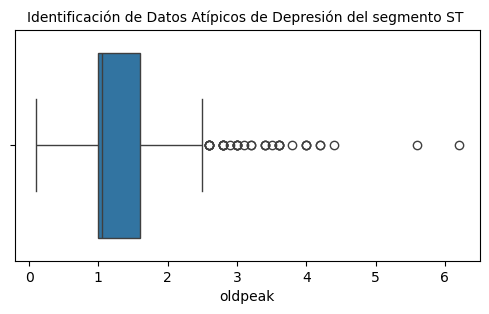

In [138]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Atípicos de Depresión del segmento ST ', fontsize=10 )

In [140]:
#Conteo de Datos Atípicos

nivel_oldpeak_minimo=0
nivel_oldpeak_maximo=3
Total_Atipicos_oldpeak=((Datos['oldpeak']<nivel_oldpeak_minimo)|(Datos['oldpeak']>nivel_oldpeak_maximo)).sum()
print("El total de datos atípicos de Depresión del segmento ST es {}".format(Total_Atipicos_oldpeak))

nivel_thalach_minimo=80
nivel_thalach_maximo=202
Total_Atipicos_thalach=((Datos['thalach']<nivel_thalach_minimo)|(Datos['thalach']>nivel_thalach_maximo)).sum()
print("El total de datos atípicos de Frecuencia cardíaca máxima alcanzada es {}".format(Total_Atipicos_thalach))

nivel_trestbps_minimo=94
nivel_trestbps_maximo=170
Total_Atipicos_trestbps=((Datos['trestbps']<nivel_trestbps_minimo)|(Datos['trestbps']>nivel_trestbps_maximo)).sum()
print("El total de datos atípicos de Presión arterial en reposo es {}".format(Total_Atipicos_trestbps))

nivel_chol_minimo=126
nivel_chol_maximo=370
Total_Atipicos_chol=((Datos['chol']<nivel_chol_minimo)|(Datos['chol']>nivel_chol_maximo)).sum()
print("El total de datos atípicos de Colesterol en sangre es {}".format(Total_Atipicos_chol))

El total de datos atípicos de Depresión del segmento ST es 20
El total de datos atípicos de Frecuencia cardíaca máxima alcanzada es 1
El total de datos atípicos de Presión arterial en reposo es 9
El total de datos atípicos de Colesterol en sangre es 5


In [142]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['oldpeak']<nivel_oldpeak_maximo)&(Datos['oldpeak']>nivel_oldpeak_minimo)]

Datos=Datos[(Datos['thalach']<nivel_thalach_maximo)&(Datos['thalach']>nivel_thalach_minimo)]

Datos=Datos[(Datos['trestbps']<nivel_trestbps_maximo)&(Datos['trestbps']>nivel_trestbps_minimo)]

Datos=Datos[(Datos['chol']<nivel_chol_maximo)&(Datos['chol']>nivel_chol_minimo)]

In [144]:
# Validar si se removieron los datos atípicos

Total_Atipicos_oldpeak=((Datos['oldpeak']<nivel_oldpeak_minimo)|(Datos['oldpeak']>nivel_oldpeak_maximo)).sum()
print("El total de datos atípicos de Depresión del segmento ST es {}".format(Total_Atipicos_oldpeak))

Total_Atipicos_thalach=((Datos['thalach']<nivel_thalach_minimo)|(Datos['thalach']>nivel_thalach_maximo)).sum()
print("El total de datos atípicos de Frecuencia cardíaca máxima alcanzada es {}".format(Total_Atipicos_thalach))

Total_Atipicos_trestbps=((Datos['trestbps']<nivel_trestbps_minimo)|(Datos['trestbps']>nivel_trestbps_maximo)).sum()
print("El total de datos atípicos de Presión arterial en reposo es {}".format(Total_Atipicos_trestbps))

Total_Atipicos_chol=((Datos['chol']<nivel_chol_minimo)|(Datos['chol']>nivel_chol_maximo)).sum()
print("El total de datos atípicos de Colesterol en sangre es {}".format(Total_Atipicos_chol))

El total de datos atípicos de Depresión del segmento ST es 0
El total de datos atípicos de Frecuencia cardíaca máxima alcanzada es 0
El total de datos atípicos de Presión arterial en reposo es 0
El total de datos atípicos de Colesterol en sangre es 0


In [146]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        254 non-null    int64  
 1   sex        254 non-null    float64
 2   cp         254 non-null    float64
 3   trestbps   254 non-null    int64  
 4   chol       254 non-null    int64  
 5   fbs        254 non-null    int64  
 6   restecg    254 non-null    float64
 7   thalach    254 non-null    int64  
 8   exang      254 non-null    float64
 9   oldpeak    254 non-null    float64
 10  slope      254 non-null    int64  
 11  ca         254 non-null    float64
 12  thal       254 non-null    float64
 13  condition  254 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 29.8 KB


### 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características¶

Característica de interes:

* condition: si la persona tiene Enfermedad cardíaca o no (0 = no tiene Enfermedad cardíaca - 1 = si tiene Enfermedad cardíaca)

* Predecir: si una persona puede tener Enfermedad cardíaca

In [186]:
# Total de personas con Enfermedad cardíaca

Datos['condition'].value_counts()

condition
0    147
1    107
Name: count, dtype: int64

In [152]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
6,0
7,1
8,0
11,1
12,1


### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [155]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [157]:
print (X_train)

     age       sex        cp  trestbps  chol  fbs   restecg  thalach  \
254   53  1.000000  3.000000       142   226    0  2.000000      111   
39    56  1.000000  1.000000       130   221    0  2.000000      163   
47    52  1.000000  1.000000       134   201    0  0.996633      158   
170   65  0.676768  3.000000       150   225    0  2.000000      114   
7     61  1.000000  2.158249       134   234    0  0.996633      145   
..   ...       ...       ...       ...   ...  ...       ...      ...   
264   50  1.000000  3.000000       144   200    0  2.000000      126   
214   58  1.000000  3.000000       128   216    0  2.000000      131   
62    42  1.000000  1.000000       120   295    0  0.996633      162   
14    56  1.000000  2.158249       120   193    0  2.000000      162   
90    62  1.000000  2.000000       130   231    0  0.996633      146   

        exang   oldpeak  slope        ca      thal  
254  1.000000  1.055556      0  0.676768  2.000000  
39   0.326599  1.055556      

In [159]:
print (Y_train)

254    0
39     0
47     0
170    1
7      1
      ..
264    1
214    1
62     0
14     0
90     0
Name: condition, Length: 190, dtype: int64


### 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [162]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [164]:
print (Y_test)

86     1
124    0
166    0
232    0
101    0
      ..
177    0
35     1
125    0
179    1
118    0
Name: condition, Length: 64, dtype: int64


In [166]:
print (Prediccion)

[1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0]


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [169]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        37
           1       0.92      0.85      0.88        27

    accuracy                           0.91        64
   macro avg       0.91      0.90      0.90        64
weighted avg       0.91      0.91      0.91        64



### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

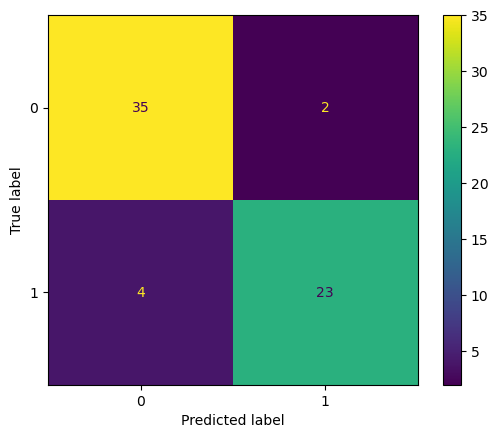

In [172]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

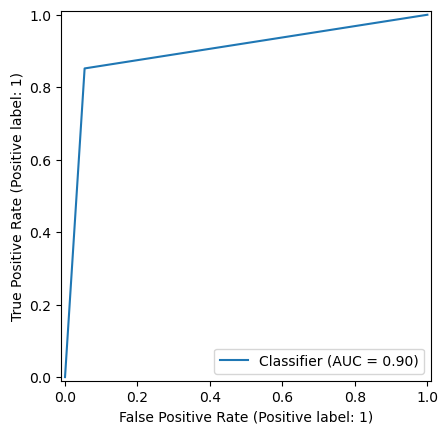

In [174]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

### 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

-Precisión:  0.92 indica que el 92% de las instancias que el modelo ha clasificado como positivas son realmente positivas. Esto sugiere que el modelo es bastante efectivo para no generar falsos positivos.

-Recall: 0.85 indica que el modelo ha identificado correctamente el 85% de los casos positivos reales. Sin embargo, también sugiere que el 15% de los casos positivos han sido clasificados incorrectamente como negativos (falsos negativos).

-F1 Score: 0.88 indica un buen equilibrio entre precisión y recall. Este valor sugiere que, aunque el modelo tiene una alta precisión y un buen recall, hay espacio para mejorar en la identificación de todos los positivos.


#### De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 35

- Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 23

- Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 2

- Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 4

#### De la curva de precisión del modelo se puede interpretar:

- El AUC es 0,90 lo que significa que el 90 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.